<a href="https://colab.research.google.com/github/rodolfowenceslau/projetoenem/blob/master/Enem_autosklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalação das Bibliotecas

In [ ]:
#Instalação de bibliotecas para o uso do Auto-Sklearn
!pip install Cython numpy
!apt-get install swig -y
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 0s (10.9 MB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpac

In [ ]:
#Manipulação de dados, DataFrames, arrays, matrizes...
import pandas as pd
import numpy as np

#Montagem do GDRIVE
from google.colab import drive

#Métricas de validação dos modelos
from sklearn.metrics import (accuracy_score, classification_report, roc_curve, roc_auc_score)

#Pré-processamento
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder

#Auto ML
import autosklearn.classification

#Plotagem de gráficos
import matplotlib.pyplot as plt

In [ ]:
#Montar o Google Drive
drive.mount('/content/drive/')

#Montar o nome do caminho e arquivo no qual o dataset tratado do Enem foi salvo no drive
caminhoDoArquivo = "/content/drive/My Drive/Colab Notebooks/data/MICRODADOS_ENEM_2018_TRATADO_FINAL.csv"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Ler arquivo CSV do Enem para dentro da variável dataframe
#Parâmetros:
#   caminhoDoArquivo - localização do arquivo no Google Drive
#   encoding - tipo de codificação que determina como os caracteres serão exibidos
#   sep - caracter que separa as colunas do dataset
dataframe = pd.read_csv(caminhoDoArquivo, encoding='utf-8', sep=',')

In [ ]:
#Mostrando o dataframe na tela
dataframe

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_MAQUINA_BRAILE,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_LINGUA,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,PASSOU_ENEM
0,São João dos Patos,MA,23.0,F,3,1,1,5,1,0,0,São João dos Patos,MA,0,B,B,A,A,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A,Nao
1,João Pessoa,PB,23.0,F,1,1,1,5,1,0,0,João Pessoa,PB,1,C,D,C,B,1,B,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,B,A,B,B,A,A,Nao
2,Parnaíba,PI,39.0,M,3,1,1,12,1,0,0,Parnaíba,PI,0,A,E,A,D,4,H,A,B,C,A,A,B,A,A,A,A,A,A,C,B,A,B,A,B,B,A,A,Sim
3,Fortaleza,CE,19.0,M,3,1,2,0,2,0,0,Fortaleza,CE,0,D,D,C,B,7,C,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,B,A,Nao
4,Cuiabá,MT,25.0,F,3,1,1,9,1,0,0,Cuiabá,MT,1,C,C,C,B,1,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226556,Curitiba,PR,17.0,F,1,1,2,0,4,0,0,Curitiba,PR,0,G,F,D,D,4,L,A,C,D,C,A,B,A,B,A,B,A,B,B,B,B,E,B,B,B,B,D,Sim
2226557,São Paulo,SP,20.0,F,2,1,1,2,1,0,0,São Paulo,SP,0,B,F,C,D,4,G,A,B,C,B,A,B,A,A,A,B,A,A,B,B,B,D,B,A,B,A,A,Sim
2226558,Blumenau,SC,18.0,M,1,1,2,0,2,0,0,Blumenau,SC,1,C,C,D,B,5,D,A,B,C,B,A,B,A,B,A,B,A,A,B,B,B,D,B,A,B,B,A,Sim
2226559,São Paulo,SP,18.0,M,1,1,1,1,1,0,0,São Paulo,SP,0,D,C,D,B,2,B,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,B,A,D,Nao


In [ ]:
#Identificando os tipos de cada uma das colunas da variável dataframe
dataframe.dtypes

NO_MUNICIPIO_RESIDENCIA     object
SG_UF_RESIDENCIA            object
NU_IDADE                   float64
TP_SEXO                     object
TP_COR_RACA                  int64
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
TP_ANO_CONCLUIU              int64
TP_ESCOLA                    int64
IN_TREINEIRO                 int64
IN_MAQUINA_BRAILE            int64
NO_MUNICIPIO_PROVA          object
SG_UF_PROVA                 object
TP_LINGUA                    int64
Q001                        object
Q002                        object
Q003                        object
Q004                        object
Q005                         int64
Q006                        object
Q007                        object
Q008                        object
Q009                        object
Q010                        object
Q011                        object
Q012                        object
Q013                        object
Q014                        object
Q015                

In [ ]:
#Funçao que codifica as colunas do DataFrame alterando o tipo das variáveis object para numérico
#A maioria dos algoritmos trabalha com valores numéricos, portanto, a conversão/codificação dos tipos
#foi uma estratégia para facilitar o uso dos algoritmos.
#Parâmetro:
#   dataframe - variável do tipo DataFrame
def codificarColunas(dataframe):
  label_encoders = {} # Cria um dicionário para guardar cada label encoder e permitir o processo inverso
  for col in dataframe.select_dtypes('object'): # Para cada uma das colunas do tipo object
      label_encoder = LabelEncoder() # Cria um label encoder
      label_encoder.fit(dataframe[col]) # "Treina" o label encoder 
      dataframe[col] = label_encoder.transform(dataframe[col]) # Realiza o processo de codificação da string para o código
      label_encoders[col] = label_encoder # Salva o label encoder treinado
  #print(csv.dtypes)
  return dataframe

In [ ]:
#Realiza a chamada para a função criada anteriormente, atribuindo o valor retornado para a nova variável "dataframe"
dataframe = codificarColunas(dataframe)
dataframe.dtypes

NO_MUNICIPIO_RESIDENCIA      int64
SG_UF_RESIDENCIA             int64
NU_IDADE                   float64
TP_SEXO                      int64
TP_COR_RACA                  int64
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
TP_ANO_CONCLUIU              int64
TP_ESCOLA                    int64
IN_TREINEIRO                 int64
IN_MAQUINA_BRAILE            int64
NO_MUNICIPIO_PROVA           int64
SG_UF_PROVA                  int64
TP_LINGUA                    int64
Q001                         int64
Q002                         int64
Q003                         int64
Q004                         int64
Q005                         int64
Q006                         int64
Q007                         int64
Q008                         int64
Q009                         int64
Q010                         int64
Q011                         int64
Q012                         int64
Q013                         int64
Q014                         int64
Q015                

In [ ]:
#Mostra a dimensionalidade do objeto DataFrame (linhas e colunas)
dataframe.shape

(2226561, 42)

##Separação das amostras

In [ ]:
# Função para retornar os dados do ENEM separados em X e y
def getDadosEnem():
    dados = dataframe.copy()
    X = dados.copy()
    X.drop(['PASSOU_ENEM'], axis=1, inplace=True)
    y = dados['PASSOU_ENEM']
    return X, y

In [ ]:
# Chamada para a função anterior
X, y = getDadosEnem()

In [ ]:
#Verificando a dimensionalidade para constatar a diminuição de colunas após a retirada da variável alvo
X.shape

(2226561, 41)

In [ ]:
#Verificando a dimensionalidade para constatar a remoção da variável alvo
y.shape

(2226561,)

In [ ]:
#Realiza a separação de forma randômica das amostras do DataFrame atribuindo os valores da separação
#para as variáveis X_treinamento, X_teste, y_treinamento e y_teste
#A função train_test_split admite outros parâmetros inclusive a possibilidade de se determinar o
#tamanho da amostra de testes desejada, através do atributo test_size. Exemplo: test_size=0.2 separa 20% da amostra para testes
X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, random_state=1)

In [ ]:
#Impressão da dimensionalidade de cada uma das variáveis criadas pela divisão do código anterior
print(X_train)
print(X_test)
print(y_train)
print(y_test)

         NO_MUNICIPIO_RESIDENCIA  SG_UF_RESIDENCIA  NU_IDADE  ...  Q025  Q026  Q027
1142233                     4756                25      23.0  ...     1     0     0
439494                      2044                25      17.0  ...     0     1     0
1736218                      534                13      18.0  ...     1     0     0
804835                      2161                 4      21.0  ...     0     0     0
698639                      1891                17      20.0  ...     1     0     0
...                          ...               ...       ...  ...   ...   ...   ...
73349                        417                23      46.0  ...     1     0     0
836489                      2161                 4      17.0  ...     1     1     0
491263                      4194                 4      47.0  ...     1     0     0
491755                      3897                15      20.0  ...     0     0     0
128037                      4752                 1      25.0  ...     0     

In [ ]:
#Impressão da dimensionalidade de cada uma das variáveis criadas pela divisão do código anterior
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1669920, 41)
(556641, 41)
(1669920,)
(556641,)


##AutoSklearnClassifier

In [ ]:
#Instanciação do AutoSklearnClassifier e atribuição do objeto para a variável automl
automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=120,    #Limite de tempo em segundos para a busca dos modelos adequados.
          per_run_time_limit=60,          #Limite de tempo para uma única chamada para o modelo de aprendizado de máquina.
          ensemble_memory_limit=10240,    #Limite de memória em MB para o processo de construção do conjunto (ensemble). auto-sklearn irá reduzir o número de modelos considerados ( ensemble_nbest) se o limite de memória for atingido.
          ml_memory_limit=10240,          #Limite de memória em MB para o algoritmo de aprendizado de máquina. auto-sklearn irá parar de ajustar o algoritmo de aprendizado de máquina se tentar alocar mais de ml_memory_limit MB. Se Nenhum for fornecido, nenhum limite de memória será definido. 
          n_jobs=-1                       #O número de tarefas para execução paralela fit(). O -1 significa o uso de todos os processadores.
)

In [ ]:
#Ajusta/Treina os conjuntos de dados de treinamento passados com parâmetros
#A função fit() otimiza os modelos de aprendizado de máquina e cria um conjunto (ensemble de modelos) a partir deles.
automl.fit(X_train, y_train)

[WARNING] [2020-08-08 14:24:22,152:AutoML(1791095845):9e2cffb1b1fcf48f75c2a08653c01787] Capping the per_run_time_limit to 53.0 to have time for a least 2 models in each process.
[WARNING] [2020-08-08 14:24:24,181:AutoML(1872583848):9e2cffb1b1fcf48f75c2a08653c01787] Capping the per_run_time_limit to 52.0 to have time for a least 2 models in each process.


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnClassifier(delete_output_folder_after_terminate=False,
                      delete_tmp_folder_after_terminate=False,
                      disable_evaluator_output=False,
                      ensemble_memory_limit=10240, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=None, include_preprocessors=None,
                      initial_configurations_via_metalearning=25,
                      logging_config=None, max_models_on_disc=50,
                      metadata_directory=None, metric=None,
                      ml_memory_limit=10240, n_jobs=-1, output_folder=None,
                      per_run_time_limit=60, resampling_strategy='holdout',
                      resampling_strategy_arguments=None, seed=1,
                      shared_mode=False, smac_scenario_args=None,
                      time_left_for_this_task=120,

In [ ]:
#Prediz a classificação para o X (amostra de teste) passada como parâmetro
y_pred = automl.predict(X_test)

In [ ]:
#Retorna a acurácia média dos dados e alvo fornecidos.
score = accuracy_score(y_test, y_pred)
print(score)

0.4991799023068728


In [ ]:
#O classification report (relatório de classificação) traz um resumo das principais métricas para avaliar o problema de classificação
#É importante compreender o significado da métrica e do objetivo de negócio para determinar qual a melhor métrica para avaliar o modelo.
#precision - proporção de positivos classificados corretamente, ou seja, dos rótulos previstos como positivos, quantos são positivos realmente (rótulo verdadeiro). 
#recall - proporção de positivos identificados corretamente, ou seja, dos rótulos verdadeiros, quantos são positivos realmente (rótulo verdadeiro).
#f1-score - média harmônica entre precision e recall
#support - quantidade total de ocorrências de cada um dos rótulos de previsão (0 - Não e 1 - Sim)
#accuracy - número de acertos (positivos e negativos [0 e 1)) dividido pela quantidade total de registros
print(classification_report(y_pred, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67    556641
           1       0.00      0.00      0.00         0

    accuracy                           0.50    556641
   macro avg       0.50      0.25      0.33    556641
weighted avg       1.00      0.50      0.67    556641



In [ ]:
#Retorna uma representação final do conjunto (ensemble) encontrado pelo auto-sklearn
automl.show_models()

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


'[(1.000000, MyDummyClassifier(configuration=1, init_params=None, random_state=None)),\n]'

In [ ]:
#Retorna as estatísticas resultantes da execução do modelo
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 9e2cffb1b1fcf48f75c2a08653c01787
  Metric: accuracy
  Number of target algorithm runs: 4
  Number of successful target algorithm runs: 0
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 1



##AutoSklearn2Classifier

In [ ]:
from autosklearn.experimental.askl2 import AutoSklearn2Classifier

In [ ]:
automl = autosklearn.experimental.askl2.AutoSklearn2Classifier(
          time_left_for_this_task=28800,
          ensemble_memory_limit=10240,
          ml_memory_limit=10240,
          n_jobs=-1
)

In [ ]:
automl.fit(X_train, y_train)

Using Backup selector


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

[ERROR] [2020-08-04 11:11:21,374:EnsembleBuilder(1791095845):9e2cffb1b1fcf48f75c2a08653c01787] Failed to lock model 1872583848.7.6.25.model files due to error 


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearn2Classifier(delete_output_folder_after_terminate=False,
                       delete_tmp_folder_after_terminate=False,
                       disable_evaluator_output=False,
                       ensemble_memory_limit=10240, ensemble_nbest=50,
                       ensemble_size=50, logging_config=None,
                       max_models_on_disc=50, metric=None,
                       ml_memory_limit=10240, n_jobs=-1, output_folder=None,
                       seed=1, shared_mode=False, smac_scenario_args=None,
                       time_left_for_this_task=28800, tmp_folder=None)

In [ ]:
#X_test = np.array(X_test, dtype='int')
y_pred = automl.predict(X_test)

In [ ]:
score = accuracy_score(y_test, y_pred)
print(score)

0.7168695802141776


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73    299082
           1       0.68      0.74      0.71    257559

    accuracy                           0.72    556641
   macro avg       0.72      0.72      0.72    556641
weighted avg       0.72      0.72      0.72    556641



In [ ]:
automl.show_models()

"[(0.280000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'off', 'classifier:gradient_boosting:l2_regularization': 0.0036634444675489692, 'classifier:gradient_boosting:learning_rate': 0.5588113559708583, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 41, 'classifier:gradient_boosting:min_samples_leaf': 37, 'classifier:gradient_boosting:scoring': 'loss', 'cla

In [ ]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 9e2cffb1b1fcf48f75c2a08653c01787
  Metric: accuracy
  Best validation score: 0.716307
  Number of target algorithm runs: 98
  Number of successful target algorithm runs: 90
  Number of crashed target algorithm runs: 8
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



In [ ]:
y_pred_proba = automl.predict_proba(X_test)[::,1]

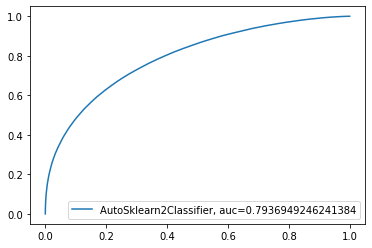

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AutoSklearn2Classifier, auc="+str(auc))
plt.legend(loc=4)
plt.show()